# #LendingClubCaseStudy

Lending Club Company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface

This case study to "the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment"


In [166]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [167]:
#Importing the Source data
df_Len_club = pd.read_csv("loan.csv",index_col=0)

C:\Users\apallepati\AppData\Local\Temp\ipykernel_11032\2002995833.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Len_club = pd.read_csv("loan.csv",index_col=0)


In [168]:
#Looking the data
df_Len_club.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Check the shape of the dataframe

In [169]:
df_Len_club.shape

(39717, 110)

## Understaing Sample provided lending Club loan data

In [170]:
df_Len_club.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    member_id                       39717 non-null  int64  
 1    loan_amnt                       39717 non-null  int64  
 2    funded_amnt                     39717 non-null  int64  
 3    funded_amnt_inv                 39717 non-null  float64
 4    term                            39717 non-null  object 
 5    int_rate                        39717 non-null  object 
 6    installment                     39717 non-null  float64
 7    grade                           39717 non-null  object 
 8    sub_grade                       39717 non-null  object 
 9    emp_title                       37258 non-null  object 
 10   emp_length                      38642 non-null  object 
 11   home_ownership                  39717 non-null  object 
 12   annual_inc

In [171]:
df_Len_club.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [172]:
# Verifiying null /emty values
df_Len_club.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [173]:
empty_cols = [col for col in df_Len_club.columns if df_Len_club[col].isnull().all()]

In [174]:
empty_cols

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

## Data Cleaning and Manipulation/missing value handling 

In [175]:
df_Len_club.drop(empty_cols,axis = 1 , inplace = True)

In [176]:
#Verifing if all the Emty columns are deleted
df_Len_club.shape

(39717, 56)

In [177]:
empty_cols = [col for col in df_Len_club.columns if df_Len_club[col].isnull().all()]

In [179]:
empty_cols

[]

### Find the Percentage of missing values

In [181]:
round((100*df_Len_club.isnull().sum() / len(df_Len_club)).sort_values(ascending = False), 2)


next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
annual_inc                     0.00
last_pymnt_amnt                0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
installment                    0.00
int_rate                       0.00
out_prncp                      0.00
term                           0.00
policy_code                 

### Deleting Columns null value percentage is more than 60%

In [182]:
dropColList = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq']
df_Len_club = df_Len_club.drop(dropColList, axis=1)

In [183]:
# Verify if the columns 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq' are delted 

round((100*df_Len_club.isnull().sum() / len(df_Len_club)).sort_values(ascending = False), 2)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
policy_code                    0.00
total_rec_prncp                0.00
total_acc                      0.00
initial_list_status            0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
delinq_amnt                    0.00
application_type               0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
revol_bal                      0.00
acc_now_delinq                 0.00
last_pymnt_amnt                0.00
collection_recovery_fee     

### Deleting Customer Behavioral columns/variables

In [187]:
dropColList=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
df_Len_club = df_Len_club.drop(dropColList, axis=1)

In [188]:
#Verify if columns are deleted 
df_Len_club.shape

(39717, 34)

In [189]:
#Finding null values percentage
round((100*df_Len_club.isnull().sum() / len(df_Len_club)).sort_values(ascending = False), 2)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
initial_list_status            0.00
policy_code                    0.00
acc_now_delinq                 0.00
total_acc                      0.00
delinq_amnt                    0.00
dti                            0.00
addr_state                     0.00
zip_code                       0.00
purpose                        0.00
member_id                      0.00
loan_amnt                      0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
sub_grade                      0.00
grade                       

In [191]:
df_Len_club.desc.describe()                          

count     26777
unique    26527
top            
freq        210
Name: desc, dtype: object

In [192]:
df_Len_club.desc.value_counts() 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [193]:
#Deletng the desc columns as it has description/commnets for loan details and not cosidering this column for analysis 
dropColList = ['desc']
df_Len_club = df_Len_club.drop(dropColList, axis=1)

In [194]:
#Finding null values percentage
round((100*df_Len_club.isnull().sum() / len(df_Len_club)).sort_values(ascending = False), 2)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
purpose                       0.00
policy_code                   0.00
acc_now_delinq                0.00
total_acc                     0.00
delinq_amnt                   0.00
dti                           0.00
addr_state                    0.00
zip_code                      0.00
initial_list_status           0.00
member_id                     0.00
url                           0.00
loan_amnt                     0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate            

### Not taking any action on below columns as the null value percentage is lessthan 7 % and not considering these columns for analysis
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03

### Not considering the Current loans for data analysis ,as this loans are still active

In [196]:
#Find the values of loan status and there distribution
df_Len_club.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [198]:
#Deleting the records for Current loan
df_Len_club = df_Len_club[df_Len_club.loan_status != 'Current']


In [200]:
#Verify if the Current loan are removed
df_Len_club.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [201]:
df_Len_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 1077501 to 87023
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  object 
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_title                   36191 non-null  object 
 10  emp_length                  37544 non-null  object 
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status      

In [202]:
# Chnage the column name from term to term_months

In [203]:
df_Len_club = df_Len_club.rename({'term': 'term_months'}, axis=1) 


In [206]:
#Remove months from Term_months data an dconvert to int type
df_Len_club.term_months=df_Len_club.term_months.apply(lambda x: x[:-7])

In [208]:
df_Len_club.term_months= df_Len_club.term_months.astype("int32")


In [210]:
df_Len_club.term_months

id
1077501    36
1077430    60
1077175    36
1076863    36
1075269    36
           ..
92187      36
90665      36
90395      36
90376      36
87023      36
Name: term_months, Length: 38577, dtype: int32

In [211]:
# removing column URL as it as the duplicate data from id
#and removing % form int_rate and revol_util
df_Len_club.drop('url', axis=1, inplace = True)
df_Len_club.int_rate = df_Len_club.int_rate.str[:-1].astype(float)
df_Len_club.revol_util = df_Len_club.revol_util.str[:-1].astype(float)

In [245]:
df_Len_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 1077501 to 87023
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term_months                 38577 non-null  int32  
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_title                   36191 non-null  object 
 10  emp_length                  37544 non-null  object 
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status      

## Data analysis 

In [217]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

<AxesSubplot:>

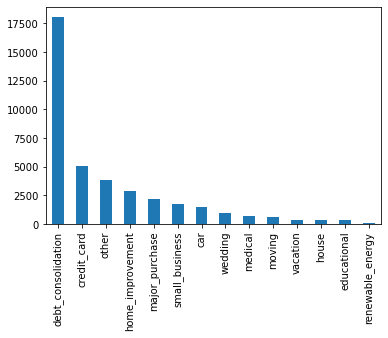

In [236]:
#Plot the reason for the loan  
df_Len_club['purpose'].value_counts().plot.bar()


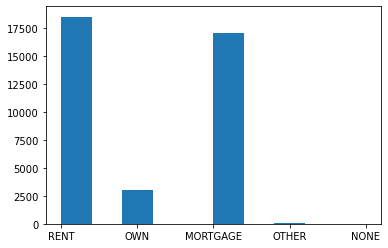

In [237]:
#  distribution of loan on home Owner ship 

plt.hist(df_Len_club.home_ownership)
plt.show()

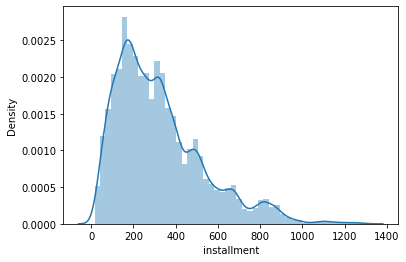

In [243]:
#loan instalment distribution

sns.distplot(df_Len_club.installment)
plt.show()

<AxesSubplot:>

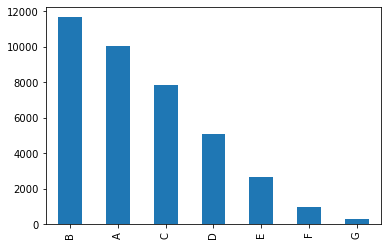

In [244]:
#Grade wise distribution 
df_Len_club['grade'].value_counts().plot.bar()

In [ ]:
corr = loan.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plot.figure(figsize = (15,8))
sea.heatmap(corr, annot = True, cmap='Blues')
plot.show()